<h1><center><b>House Price using advanced regression technique</b></center></h1>
<img src = "https://www.mipropertygroup.com.au/wp-content/uploads/2016/10/house-prices-double.jpeg">
<p>House Price dataset is a semi supervised data which is divided into two parts Train(supervised) and Test(unsupervised). so,using Train supervised data we have to predict unsupervised data<p> 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv("/home/rohit_psspl/Desktop/machine learning projects/kaggle/House Price advanced regression technique/train.csv")
test = pd.read_csv("/home/rohit_psspl/Desktop/machine learning projects/kaggle/House Price advanced regression technique/test.csv")

In [7]:
print("train  ----->  size : ",train.size,"  ","shape : ",train.shape)
print("test  ----->  size : ",test.size,"  ","shape : ",test.shape)

train  ----->  size :  118260    shape :  (1460, 81)
test  ----->  size :  116720    shape :  (1459, 80)


In [8]:
test.columns   # in test data we do not have target

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
test.shape

(1459, 80)

In [10]:
train .columns  # in train data we have target(Saleprice)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
print("Train data shape : ", train.shape ,"\n","Test data shape : ",test.shape)

Train data shape :  (1460, 81) 
 Test data shape :  (1459, 80)


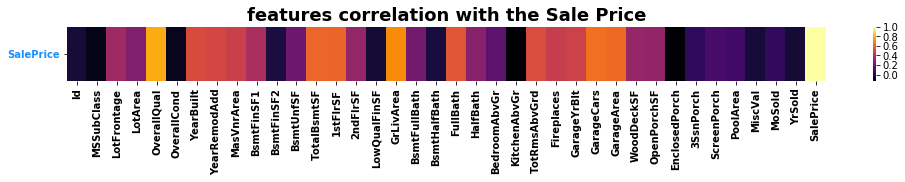

Here we are checking the features correlation with SalePrice


In [12]:
corr =train.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(corr.sort_values(by=['SalePrice'],ascending=False).head(1), cmap='inferno')
plt.title("features correlation with the Sale Price", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()
print("Here we are checking the features correlation with SalePrice")

In [13]:
realtion = corr['SalePrice'].head(85).to_frame()
cm = sns.light_palette("blue", as_cmap=True)
realtion.style.background_gradient(cmap=cm)

,SalePrice
Id,-0.0219167
MSSubClass,-0.0842841
LotFrontage,0.351799
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.0778559
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
BsmtFinSF1,0.38642


In [14]:
X_train = train.drop(['SalePrice'],axis=1)  # splitting supervised data into features and label
y_train = train['SalePrice']

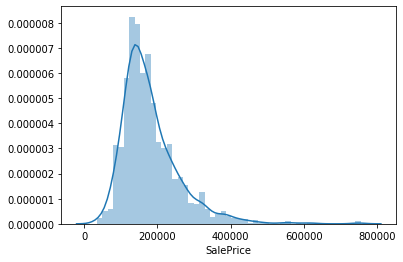

In [15]:
sns.distplot(train['SalePrice']);


In [16]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [17]:
print("X_train : ", X_train.shape)

X_train :  (1460, 80)


In [18]:
data = pd.concat([X_train,test])   # concating the supervised(train) and unsupervised data(test) data features for EDA....

In [19]:
print("DATA Shape after concatenaion :",data.shape)

DATA Shape after concatenaion : (2919, 80)


In [20]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [21]:
objects = data.select_dtypes(include=['object']).columns                   # checking the objects of data 
objects

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
data[objects].isnull().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [23]:
data = data.drop(['Id','Alley','Fence','FireplaceQu','MiscFeature','PoolQC'],axis=1)   # droping the unrelevant data

In [24]:
data['BsmtCond'].fillna(0, inplace = True)
data['BsmtExposure'].fillna(0, inplace = True)
data['BsmtFinType1'].fillna(0, inplace = True)
data['BsmtFinType2'].fillna(0, inplace = True)
data['BsmtQual'].fillna(0, inplace = True)
data['Electrical'].fillna(0, inplace = True)
data['Exterior1st'].fillna(0, inplace = True)
data['Exterior2nd'].fillna(0, inplace = True)
data['Functional'].fillna(0, inplace = True)
data['GarageCond'].fillna(0, inplace = True)
data['GarageFinish'].fillna(0, inplace = True)
data['GarageCond'].fillna(0, inplace = True)
data['GarageQual'].fillna(0, inplace = True)
data['GarageType'].fillna(0, inplace = True)
data['KitchenQual'].fillna(0, inplace = True)
data['MSZoning'].fillna(0, inplace = True)
data['MasVnrType'].fillna(0, inplace = True)
data['SaleType'].fillna(0, inplace = True)
data['Utilities'].fillna(0, inplace = True)

In [25]:
integer = data.select_dtypes(include=['int','float64']).columns   #checking the float and int type features
integer

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [26]:
data[integer].isnull().sum()

MSSubClass         0
LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [29]:
data['BsmtFinSF1'].fillna(0, inplace = True)            #filling the intand float features with 0
data['BsmtFinSF2'].fillna(0, inplace = True)
data['BsmtFullBath'].fillna(0, inplace = True)
data['BsmtHalfBath'].fillna(0, inplace = True)
data['BsmtUnfSF'].fillna(0, inplace = True)
data['GarageArea'].fillna(0, inplace = True)
data['GarageCars'].fillna(0, inplace = True)
data['GarageYrBlt'].fillna(0, inplace = True)
data['LotFrontage'].fillna(0, inplace = True)
data['MasVnrArea'].fillna(0, inplace = True)
data['TotalBsmtSF'].fillna(0, inplace = True)

In [30]:
data.isnull().sum().sum()

0

In [31]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [33]:
data = pd.get_dummies(data)                 #Convert categorical variable into dummy/indicator variables.

In [34]:
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [36]:
from sklearn.decomposition import PCA               #it is a data reduction technique

In [37]:
pca = PCA(n_components=8)

In [38]:
data = pca.fit_transform(data)

In [39]:
data = pd.DataFrame(data)

In [40]:
X_train = data[0:1460]
X_test = data[1460:]

In [41]:
print(X_train.shape, "\n",X_test.shape)

(1460, 8) 
 (1459, 8)


In [42]:
from sklearn.linear_model import Lasso

In [50]:
lasso = Lasso(alpha=10)

In [51]:
lasso.fit(X_train,y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
print(lasso.score(X_train,y_train))

0.6510944992547968


In [53]:
pred = lasso.predict(X_test)

In [54]:
id = test['Id']

In [55]:
Sub = pd.DataFrame({'Id':id,"SalePrice":pred})

In [56]:
Sub

,Id,SalePrice
0,1461,127482.193740
1,1462,162466.689674
2,1463,193467.799045
3,1464,188157.188944
4,1465,172300.090424
...,...,...
1454,2915,73688.373467
1455,2916,116502.536809
1456,2917,186341.568179
1457,2918,87877.153832


In [57]:
Sub.to_csv('submission.csv',index=False)